## Predicting energy production from wind turbines


In this project, simple linear regression using Python will be explained in the energy production data set. The goal is to accurately predict the energy production of the wind turbine from wind speed values using the data set as a basis.

### Setting the notebook to run the codes

In [69]:
# Pandas is a library for manipulating and analyzing data
import pandas as pd

# NumPy is a package that supports multidimensional arrays and arrays
import numpy as np

# Seaborn is a data visualization library. It provides a high-level interface for drawing attractive statistical graphs.
import seaborn as sns

# Matplotlib is a library for creating graphs and data visualizations in general
import matplotlib.pyplot as plt

# % matplotlib inline defines that the output of the plotting commands is displayed directly below the code cell.
%matplotlib inline

In [70]:
# Setting plot style.
plt.style.use("ggplot")

# Setting the sizes of the figures.
plt.rcParams["figure.figsize"] = (14,7)

### Opening and reading the dataset

In [71]:
# opening and reading the file
df = pd.read_csv('powerproduction.csv')

When we collect information, we generally do it by sampling. This information goes far beyond numbers or words, they bring with them characteristics and contexts that will be fundamental for our future analyzes. Each of these characteristics collected, such as weight, height, sex or age, is called a variable.

Variables can take on different values, which can basically be separated into:

##### Quantitative or numerical variables: 
- Discreet: assume only integer values. Eg: number of brothers, number of passengers.
- Continuous: assume any value in the range of real numbers. Ex .: weight, height.

##### Qualitative or categorical variables:
- Nominal: when the categories do not have a natural order. Eg: names, colors, sex.
- Ordinal: when categories can be ordered. Eg: size (small, medium, large), social class (low, medium, high), education level (basic, medium, undergraduate, graduate).


As we know that we are dealing with wind speed and energy variables (both have measurement metrics), in addition to being float type as shown below we will assume that our data are based on continuous numeric variables.

In [72]:
# analyzing information on number of columns, number of lines and type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [73]:
# analyzing the first ten lines
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [74]:
# checking for null data in the data set
df.isnull().sum()

speed    0
power    0
dtype: int64

### Initial data set view

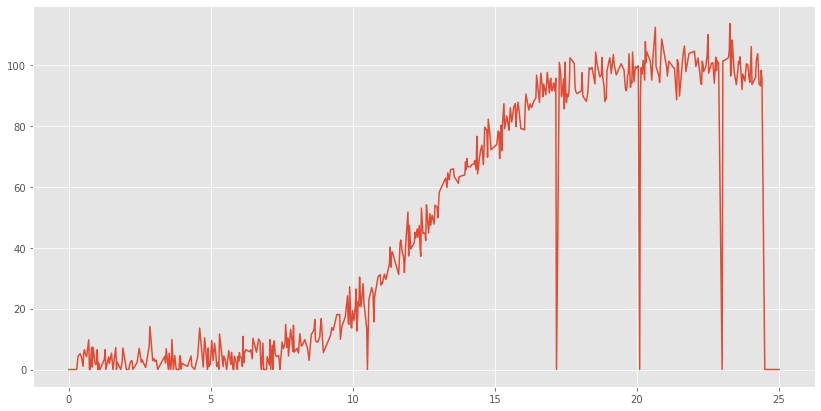

In [75]:
# Plot x vs y.
plt.plot('speed', 'power', data=df)

### Identifying and removing outliers

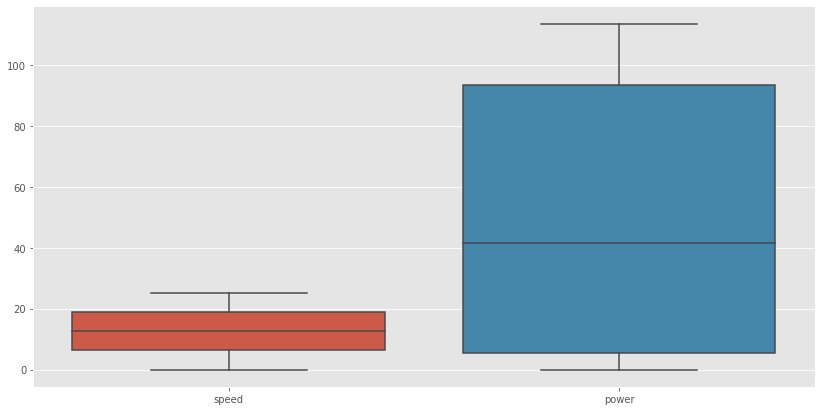

In [79]:
sns.boxplot(data=df);

First we will normalize the data and then through the standard deviation we will have some clue.

According to Gorrie, the objective of the Z-score is to remove the effects of the location and scale of the data, allowing direct comparison between different databases. As the data is centralized and re-scaled, any point that is too far from zero can be considered an outlier. According to Swarupa, a cutoff limit of the Z-score accepted by the literature is a value outside the range + or -3. [] https://en.wikipedia.org/wiki/Standard_score

https://pt.qaz.wiki/wiki/Probability_distribution



In [136]:
# assigning the variables x and y for each column
x = df['speed']
y = df['power']

# finding the mean
xi_mean = np.mean(x)
yi_mean = np.mean(y)

# fiding the standard deviation
xi_sd = np.std(x, ddof=1)
yi_sd = np.std(y, ddof=1)

# fiding the Z-score
z_score_x = (x - xi_mean)/xi_sd
z_score_y = (y - yi_mean)/yi_sd

# including normalized data in the df
df['Z-score Speed'] = pd.DataFrame(z_score_x, index=df.index)
df['Z-score Power'] = pd.DataFrame(z_score_y, index=df.index)
df.head(20)

,speed,power,Z-score Speed,Z-score Power
0,0.000,0.000,-1.742618,-1.153793
1,0.125,0.000,-1.725317,-1.153793
2,0.150,0.000,-1.721856,-1.153793
3,0.225,0.000,-1.711476,-1.153793
4,0.275,0.000,-1.704555,-1.153793
5,0.325,4.331,-1.697635,-1.049718
6,0.400,5.186,-1.687254,-1.029173
7,0.450,3.826,-1.680334,-1.061854
8,0.501,1.048,-1.673275,-1.128609
9,0.526,5.553,-1.669815,-1.020354


In [154]:
# checking for anomaly
df_norm = df.loc[(df['Z-score Power'] < (-3))]
df_norm = df.loc[(df['Z-score Power'] > (3))]
df_norm = df.loc[(df['Z-score Speed'] < (-3))]
df_norm2 = df.loc[(df['Z-score Speed'] > (3))]
df_norm

,speed,power,Z-score Speed,Z-score Power


In [164]:
# checking the zeros contained in the speed column
df_remove = df.loc[(df['speed'] == 0)]
#df_final = df.drop(df_remove.index)
len(df_remove) 

1

In [168]:
# checking the zeros contained in the power column
df_remove = df.loc[(df['power'] == 0)]
df_final = df.drop(df_remove.index)
len(df_remove) 

49

In [169]:
df_remove

,speed,power,Z-score Speed,Z-score Power
0,0.000,0.0,-1.742618,-1.153793
1,0.125,0.0,-1.725317,-1.153793
2,0.150,0.0,-1.721856,-1.153793
3,0.225,0.0,-1.711476,-1.153793
4,0.275,0.0,-1.704555,-1.153793
15,0.726,0.0,-1.642133,-1.153793
16,0.751,0.0,-1.638673,-1.153793
24,1.026,0.0,-1.600611,-1.153793
26,1.076,0.0,-1.593690,-1.153793
31,1.301,0.0,-1.562548,-1.153793


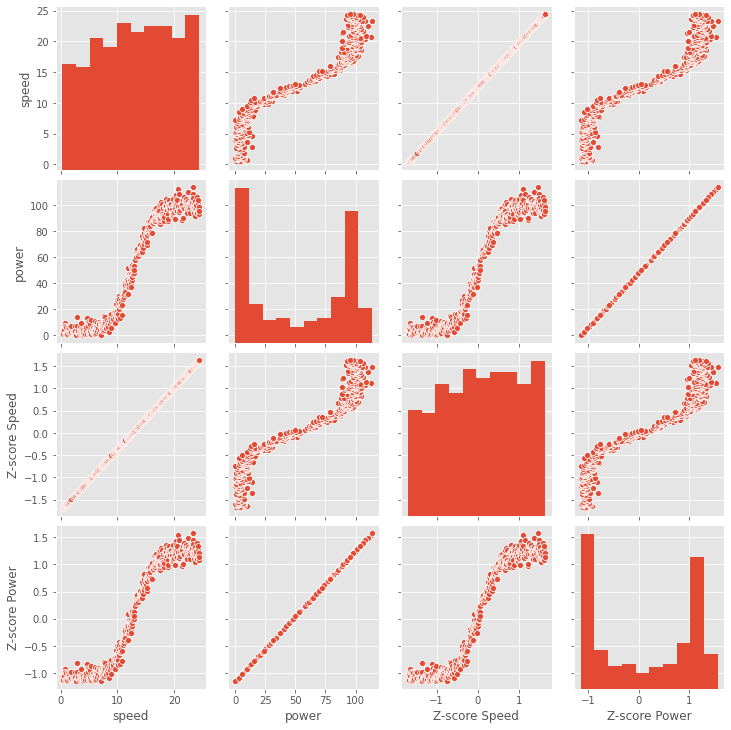

In [170]:
sns.pairplot(data=df_final)

### Correlation

The initial definition sums up the idea well: the correlation indicates the interdependence between two or more variables.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [171]:
# checking the correlations (0.7 to 0.9 positive or negative indicates a strong correlation)
df.corr(method = 'pearson')

,speed,power,Z-score Speed,Z-score Power
speed,1.000000,0.853778,1.000000,0.853778
power,0.853778,1.000000,0.853778,1.000000
Z-score Speed,1.000000,0.853778,1.000000,0.853778
Z-score Power,0.853778,1.000000,0.853778,1.000000


Linear regression is a methodology developed from statistics and econometrics. This method is used to evaluate the effects that other variables have on an analyzed variable. []

The relationship starts from a variable of interest (dependent) with others that may influence it.

With the results obtained, linear regression visualizes the biggest trends that the analyzed variables present. The regression consists of statistically modeling the values to be observed.

This regression is linear when the events observed on a scatter plot indicate a trend in a straight line format.

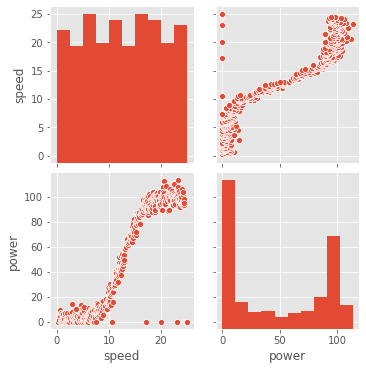

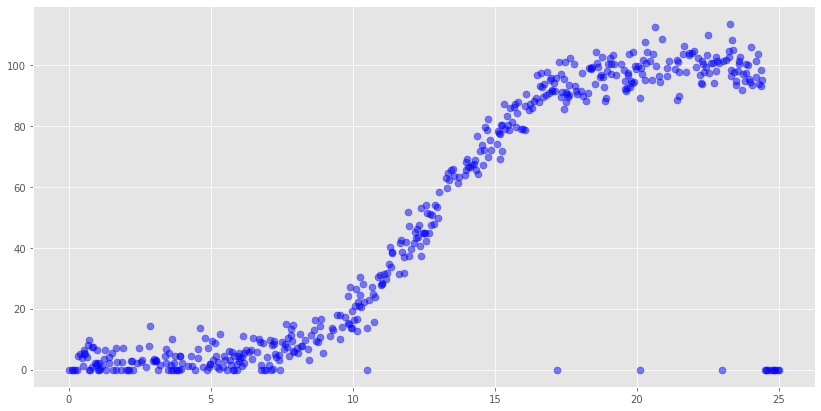

In [50]:
plt.scatter(y=df['power'], x=df['speed'], color='blue', s=50, alpha=.5)

### Ordinary Least Squares

Linear regression is simple when only two variables are analyzed, usually X and Y, one of which is dependent (Y) and the function of another that behaves independently (X).

Simple linear regression is analyzed using the formula:

### $$ y = m*x+c $$

Where "c" is the linear coefficient and "m" is the slope or regression coefficient. []

To find the value of c and m we will try to reproduce it according to the formula below.

###  Comparando a regressão linear simples com outros tipos de regressão neste conjunto de dados. 